##### _

In [1]:

# Data generation function - this is not part of the task, and is only to simulate pulling from a SQL database
# Don't worry about changing this - it's just to make the notebook a little easier!
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

def collect_from_database(query: str) -> pd.DataFrame:
    print(f"Executing: {query}")
    n_rows = 10_000
    n_features = 16
    features, labels = make_classification(
        n_samples = n_rows,
        n_features = 16,
        n_informative = 7,
        n_redundant = 4,
        n_repeated = 3,
        n_classes = 2,
        class_sep = 1.2,
        flip_y = 0.035, # Randomly invert y for added noise
        weights = [0.85,0.15],
        random_state = 1889,
    )
    df = pd.DataFrame(features, columns=[f'numeric_{i+1}' for i in range(n_features)])
    df.insert(value=labels, loc=0, column='claim_status')
    df = df.rename(columns={
        'numeric_1': 'age',
        'numeric_2': 'height_cm',
        'numeric_3': 'weight_kg',
        'numeric_4': 'income',
        'numeric_5': 'financial_hist_1',
        'numeric_6': 'financial_hist_2',
        'numeric_7': 'financial_hist_3',
        'numeric_8': 'financial_hist_4',
        'numeric_9': 'credit_score_1',
        'numeric_10': 'credit_score_2',
        'numeric_11': 'credit_score_3',
        'numeric_12': 'insurance_hist_1',
        'numeric_13': 'insurance_hist_2',
        'numeric_14': 'insurance_hist_3',
        'numeric_15': 'insurance_hist_4',
        'numeric_16': 'insurance_hist_5',
    })
    df['age'] = MinMaxScaler(feature_range=(18, 95)).fit_transform(df['age'].values[:, None])
    df['age'] = df['age'].astype('int')
    df['height_cm'] = MinMaxScaler(feature_range=(140, 210)).fit_transform(df['height_cm'].values[:, None])
    df['height_cm'] = df['height_cm'].astype('int')
    df['weight_kg'] = MinMaxScaler(feature_range=(45, 125)).fit_transform(df['weight_kg'].values[:, None])
    df['weight_kg'] = df['weight_kg'].astype('int')
    df['income'] = MinMaxScaler(feature_range=(0, 250_000)).fit_transform(df['income'].values[:, None])
    df['income'] = df['income'].astype('int')
    df['credit_score_1'] = MinMaxScaler(feature_range=(0, 999)).fit_transform(df['credit_score_1'].values[:, None])
    df['credit_score_1'] = df['credit_score_1'].astype('int')
    df['credit_score_2'] = MinMaxScaler(feature_range=(0, 700)).fit_transform(df['credit_score_2'].values[:, None])
    df['credit_score_2'] = df['credit_score_2'].astype('int')
    df['credit_score_3'] = MinMaxScaler(feature_range=(0, 710)).fit_transform(df['credit_score_3'].values[:, None])
    df['credit_score_3'] = df['credit_score_3'].astype('int')
    df['bmi'] = (df['weight_kg']/((df['height_cm']/100)**2)).astype('int')
    df['gender'] = np.where(
        df['claim_status'] == 0,
        np.random.choice([1, 0], size=(n_rows), p=[0.46, 0.54]),
        np.random.choice([1, 0], size=(n_rows), p=[0.52, 0.48])
        )
    df['marital_status'] = np.random.choice(['A', 'B', 'C', 'D', 'E', 'F'], size=(n_rows), p=[0.2, 0.15, 0.1, 0.25, 0.15, 0.15])
    df['occupation'] = np.random.choice(['A', 'B', 'C', 'D', 'E', 'F', 'G'], size=(n_rows))
    df['location'] = np.random.choice(list(string.ascii_uppercase), size=(n_rows))
    df['prev_claim_rejected'] = np.where(
        df['claim_status'] == 0,
        np.random.choice([1, 0], size=(n_rows), p=[0.08, 0.92]),
        np.random.choice([1, 0], size=(n_rows), p=[0.16, 0.84])
        )
    df['known_health_conditions'] = np.random.choice([1, 0], size=(n_rows), p=[0.06, 0.94])
    df['uk_residence'] = np.random.choice([1, 0], size=(n_rows), p=[0.76, 0.24])
    df['family_history_1'] = np.random.choice([1, 0], size=(n_rows), p=[0.22, 0.78])
    df['family_history_2'] = np.random.choice([1, 0], size=(n_rows), p=[0.25, 0.75])
    df['family_history_3'] = np.random.choice([1, None, 0], size=(n_rows), p=[0.12, 0.81, 0.07])
    df['family_history_4'] = np.random.choice([1, 0], size=(n_rows), p=[0.27, 0.73])
    df['family_history_5'] = np.random.choice([1, 0], size=(n_rows), p=[0.31, 0.69])
    df['product_var_1'] = np.random.choice([1, 0], size=(n_rows), p=[0.38, 0.62])
    df['product_var_2'] = np.random.choice([1, 0], size=(n_rows), p=[0.55, 0.45])
    df['product_var_3'] = np.random.choice(['A', 'B', 'C', 'D'], size=(n_rows), p=[0.23, 0.28, 0.31, 0.18])
    df['product_var_4'] = np.random.choice([1, 0], size=(n_rows), p=[0.76, 0.24])
    df['health_status'] = np.random.randint(1, 5, size=(n_rows))
    df['driving_record'] = np.random.randint(1, 5, size=(n_rows))
    df['previous_claim_rate'] = np.where(
        df['claim_status'] == 0,
        np.random.choice([1, 2, 3, 4, 5], size=(n_rows), p=[0.48, 0.29, 0.12, 0.08, 0.03]),
        np.random.choice([1, 2, 3, 4, 5], size=(n_rows), p=[0.12, 0.28, 0.34, 0.19, 0.07]),
    )
    df['education_level'] = np.random.randint(0, 7, size=(n_rows))
    df['income level'] = pd.cut(df['income'], bins=5, labels=False, include_lowest=True)
    df['n_dependents'] = np.random.choice(
        [1, 2, 3, 4, 5], size=(n_rows), p=[0.23, 0.32, 0.27, 0.11, 0.07]
    )
    df['employment_type'] = np.random.choice(
        [1, None, 0], size=(n_rows), p=[0.16, 0.7, 0.14]
    )
    return df

# **Pre-selection Task:** Alex's Notebook

### Imports

In [2]:
import pandas as pan
import numpy as np
from scipy import stats
from sklearn.datasets import *
from sklearn.metrics import cohen_kappa_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, confusion_matrix, log_loss, roc_curve
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import string
import shap

#Seed
np.random.seed(1889)

c:\Users\tomkn\Documents\ml_engineering_task\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data Collection

In [3]:
account_name = "rg_data_sci"
client_id = "a1b2c3d4"
client_secret = "b1c2d3e4" #Delete before commiting to ADO!!!
subscription_id = "8a7b6c5d"
tenant_id = "6f5g4h3i"
datalake_name = "rg_data_lake"

In [4]:
dataset_from_database = collect_from_database(
    "SELECT * FROM CLAIMS.DS_DATASET"
)
dataset_from_database.head(10)

Executing: SELECT * FROM CLAIMS.DS_DATASET


,claim_status,age,height_cm,weight_kg,income,financial_hist_1,financial_hist_2,financial_hist_3,financial_hist_4,credit_score_1,...,product_var_2,product_var_3,product_var_4,health_status,driving_record,previous_claim_rate,education_level,income level,n_dependents,employment_type
0,0,49,182,80,155292,1.408797,-0.573517,-0.464914,3.249624,519,...,0,A,0,3,2,1,2,3,1,0
1,0,55,185,86,169232,2.402368,1.135213,0.780797,3.075214,500,...,1,C,1,2,4,3,2,3,2,None
2,0,55,169,82,173856,-1.182139,0.337877,1.754185,1.932426,422,...,0,C,1,4,1,1,2,3,2,1
3,0,43,179,76,150264,1.107481,-1.123652,1.966727,-0.130857,297,...,1,D,1,4,1,1,0,3,2,None
4,0,56,167,86,118449,-0.985055,-0.604696,-0.650367,-1.329931,440,...,1,B,1,3,3,1,0,2,1,None
5,0,47,184,89,147966,-0.532343,1.668309,1.672834,1.083610,423,...,1,B,1,2,3,1,3,2,5,None
6,0,58,161,64,124218,-1.594298,-0.059563,-2.565507,-1.216361,392,...,0,A,1,2,1,1,2,2,3,None
7,0,55,170,96,109517,-0.867955,-1.461820,-0.543154,-1.298344,430,...,0,A,1,1,3,1,5,2,2,0
8,0,55,166,87,182091,-2.868900,-0.193578,2.230964,2.590524,349,...,0,D,1,1,2,2,5,3,3,1
9,0,52,166,78,171201,-2.935281,1.091528,1.392789,2.102653,417,...,1,B,0,1,2,1,5,3,5,None


### Data Wrangling

In [5]:
total = dataset_from_database.isnull().sum()
percent = (dataset_from_database.isnull().sum() / dataset_from_database.isnull().count()*100)
missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
types = []
for col in dataset_from_database.columns:
    dtype = str(dataset_from_database[col].dtype)
    types.append(dtype)
missing_df['Types'] = types
dataset_from_database_no_missing_values = pd.DataFrame()
dataset_from_database_no_missing_values = dataset_from_database.drop(columns=['family_history_3', 'employment_type'])
dataset_from_database.drop(columns=['family_history_3', 'employment_type'], inplace=True)

In [6]:
non_numerical = ['gender', 'marital_status', 'occupation', 'location', 'prev_claim_rejected', 'known_health_conditions', 'uk_residence', 'family_history_1', 'family_history_2', 'family_history_4', 'family_history_5', 'product_var_1', 'product_var_2', 'product_var_3', 'health_status', 'driving_record', 'previous_claim_rate', 'education_level', 'income level', 'n_dependents']

for column in non_numerical:
    dataset_from_database[column] = dataset_from_database[column].astype('category')

### Initial Model Training

In [7]:
# Separate the Dataframe into labels and features
X, y = dataset_from_database.drop('claim_status', axis=1), dataset_from_database[['claim_status']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1889)

# Build the evaluation set & metric list
eval_set = [(X_train, y_train)]
eval_metrics = ['auc', 'rmse', 'logloss']

In [8]:
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric=eval_metrics,
    enable_categorical=True
)

model.fit(X_test, y_test, eval_set=eval_set, verbose=10)

[0]	validation_0-auc:0.88356	validation_0-rmse:0.30832	validation_0-logloss:0.33807
[10]	validation_0-auc:0.94365	validation_0-rmse:0.22331	validation_0-logloss:0.18310
[20]	validation_0-auc:0.94721	validation_0-rmse:0.22070	validation_0-logloss:0.18338
[30]	validation_0-auc:0.94723	validation_0-rmse:0.22174	validation_0-logloss:0.19184
[40]	validation_0-auc:0.94727	validation_0-rmse:0.22109	validation_0-logloss:0.19829
[50]	validation_0-auc:0.94744	validation_0-rmse:0.22065	validation_0-logloss:0.20276
[60]	validation_0-auc:0.94771	validation_0-rmse:0.22041	validation_0-logloss:0.20697
[70]	validation_0-auc:0.94805	validation_0-rmse:0.22003	validation_0-logloss:0.20946
[80]	validation_0-auc:0.94792	validation_0-rmse:0.22009	validation_0-logloss:0.21380
[90]	validation_0-auc:0.94775	validation_0-rmse:0.22010	validation_0-logloss:0.21646
[99]	validation_0-auc:0.94801	validation_0-rmse:0.22006	validation_0-logloss:0.21886


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=['auc', 'rmse', 'logloss'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

### Model Evaluation

The Cohen Kappa score on the training data is: 0.77
The Cohen Kappa score on the test data is: 1.0

The accuracy on train dataset is:  0.9435
The accuracy on test dataset is:  1.0

Train confusion matrix:  [[6606  122]
 [ 330  942]]

Test confusion matrix:  [[1669    0]
 [   0  331]]

ROC on train data:  0.9480054722963828
ROC on test data:  1.0

Train log loss:  0.21886015668114897
Test log loss:  0.0043808602813128995

F1 score is:  1.0
Precision is:  1.0
Recall is:  1.0


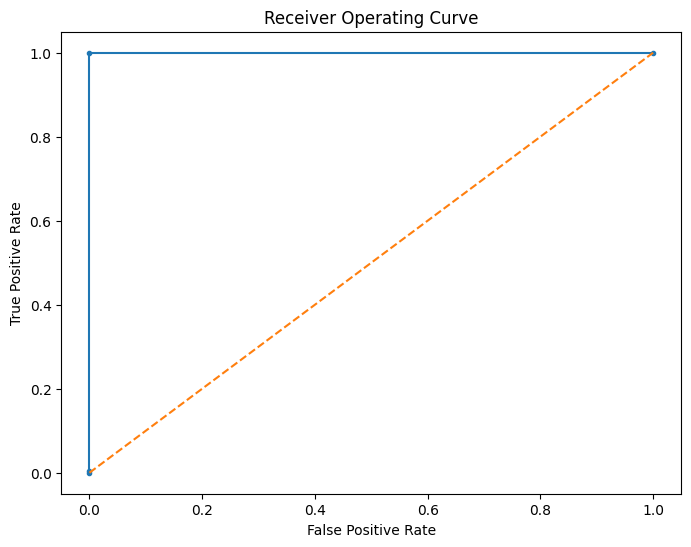

In [9]:
from sklearn.metrics import cohen_kappa_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, confusion_matrix, log_loss, roc_curve

train_class_preds = model.predict(X_train)
test_class_preds = model.predict(X_test)
train_prob_preds = model.predict_proba(X_train)[:, 1]
test_prob_preds = model.predict_proba(X_test)[:, 1]

y = np.array(y_train)
y = y.astype(int)
yhat = np.array(train_class_preds)
yhat = np.clip(np.round(yhat), np.min(y), np.max(y)).astype(int)
training_data_kappa_score = round(cohen_kappa_score(yhat, y, weights='quadratic'), 2)
print(
f"The Cohen Kappa score on the training data is: {training_data_kappa_score}"
)

y = np.array(y_test)
y = y.astype(int)
yhat = np.array(test_class_preds)
yhat = np.clip(np.round(yhat), np.min(y), np.max(y)).astype(int)
test_data_kappa_score = round(cohen_kappa_score(yhat, y, weights='quadratic'), 2)
print(
f"The Cohen Kappa score on the test data is: {test_data_kappa_score}"
)

print()
print("The accuracy on train dataset is: ", accuracy_score(y_train, train_class_preds))
print("The accuracy on test dataset is: ", accuracy_score(y_test, test_class_preds))

print()
print("Train confusion matrix: ", confusion_matrix(y_train, train_class_preds))

print()
print("Test confusion matrix: ", confusion_matrix(y_test, test_class_preds))

print()
print("ROC on train data: ", roc_auc_score(y_train, train_prob_preds))
print("ROC on test data: ", roc_auc_score(y_test, test_prob_preds))

print()
fpr, tpr, _ = roc_curve(y_test, test_prob_preds)
random_fpr, random_tpr, _ = roc_curve(y_test, [0 for _ in range(len(y_test))])
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(fpr, tpr, marker='.', label='XGBoost')
plt.plot(random_fpr, random_tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Curve")
print("Train log loss: ", log_loss(y_train, train_prob_preds))
print("Test log loss: ", log_loss(y_test, test_prob_preds))

print()
print("F1 score is: ", f1_score(y_test, test_class_preds))
print("Precision is: ", precision_score(y_test, test_class_preds))
print("Recall is: ", recall_score(y_test, test_class_preds))

ROC Curve suggests amazing performance - espeically for an initial model! easier than expected

### CV Model Training
- Cross Vaildation tests to see if I can improve the model performance - not sure if it's useful

In [10]:
parameter_gridSearch = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric=eval_metrics,
    early_stopping_rounds=15,
    enable_categorical=True,
    ),

    param_distributions={
    'n_estimators': stats.randint(50, 500),
    'learning_rate': stats.uniform(0.01, 0.75),
    'subsample': stats.uniform(0.25, 0.75),
    'max_depth': stats.randint(1, 8),
    'colsample_bytree': stats.uniform(0.1, 0.75),
    'min_child_weight': [1, 3, 5, 7, 9],
    },

    cv=5,
    n_iter=100,
    verbose=False,
    scoring='roc_auc',
)

parameter_gridSearch.fit(X_train, y_train, eval_set=eval_set, verbose=False)

print("Best parameters are: ", parameter_gridSearch.best_params_)

Best parameters are:  {'colsample_bytree': 0.48352462439768884, 'learning_rate': 0.07665492035350953, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 72, 'subsample': 0.9748036805265692}


In [11]:
model3 = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric=eval_metrics,
    early_stopping_rounds=15,
    enable_categorical=True,
    **parameter_gridSearch.best_params_ #Not sure what this does, from StackOverflow
    )

model3.fit(X_train, y_train, eval_set=eval_set, verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.48352462439768884, device=None,
              early_stopping_rounds=15, enable_categorical=True,
              eval_metric=['auc', 'rmse', 'logloss'], feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07665492035350953,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=72, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Model Evaluation

The Cohen Kappa score on the training data is: 0.93
The Cohen Kappa score on the test data is: 1.0

The accuracy on train dataset is:  0.9815
The accuracy on test dataset is:  0.959

Train confusion matrix:  [[6710   18]
 [ 130 1142]]

Test confusion matrix:  [[1661    8]
 [  74  257]]

ROC on train data:  0.9974177426169804
ROC on test data:  0.9655002633774951

Train log loss:  0.07171032011238754
Test log loss:  0.13744149788413984

F1 score is:  0.8624161073825504
Precision is:  0.969811320754717
Recall is:  0.7764350453172205


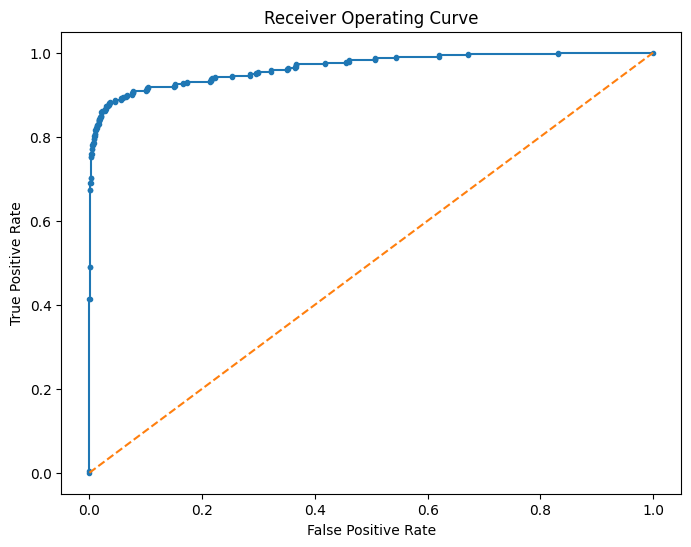

In [12]:
from sklearn.metrics import cohen_kappa_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, confusion_matrix, log_loss, roc_curve

train_class_preds2 = model3.predict(X_train)
test_class_preds2 = model3.predict(X_test)
train_prob_preds2 = model3.predict_proba(X_train)[:, 1]
test_prob_preds2 = model3.predict_proba(X_test)[:, 1]

y = np.array(y_train)
y = y.astype(int)
yhat = np.array(train_class_preds2)
yhat = np.clip(np.round(yhat), np.min(y), np.max(y)).astype(int)
kappa2 = round(cohen_kappa_score(yhat, y, weights='quadratic'), 2)
print(
f"The Cohen Kappa score on the training data is: {kappa2}"
)

y = np.array(y_test)
y = y.astype(int)
yhat = np.array(test_class_preds)
yhat = np.clip(np.round(yhat), np.min(y), np.max(y)).astype(int)
kappa2 = round(cohen_kappa_score(yhat, y, weights='quadratic'), 2)
print(
f"The Cohen Kappa score on the test data is: {kappa2}"
)

print()
print("The accuracy on train dataset is: ", accuracy_score(y_train, train_class_preds2))
print("The accuracy on test dataset is: ", accuracy_score(y_test, test_class_preds2))

print()
print("Train confusion matrix: ", confusion_matrix(y_train, train_class_preds2))

print()
print("Test confusion matrix: ", confusion_matrix(y_test, test_class_preds2))

print()
print("ROC on train data: ", roc_auc_score(y_train, train_prob_preds2))
print("ROC on test data: ", roc_auc_score(y_test, test_prob_preds2))

print()
fpr, tpr, _ = roc_curve(y_test, test_prob_preds2)
random_fpr, random_tpr, _ = roc_curve(y_test, [0 for _ in range(len(y_test))])
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(fpr, tpr, marker='.', label='XGBoost')
plt.plot(random_fpr, random_tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Curve")
print("Train log loss: ", log_loss(y_train, train_prob_preds2))
print("Test log loss: ", log_loss(y_test, test_prob_preds2))

print()
print("F1 score is: ", f1_score(y_test, test_class_preds2))
print("Precision is: ", precision_score(y_test, test_class_preds2))
print("Recall is: ", recall_score(y_test, test_class_preds2))

less performance in the ROC curve??

### Shap Values

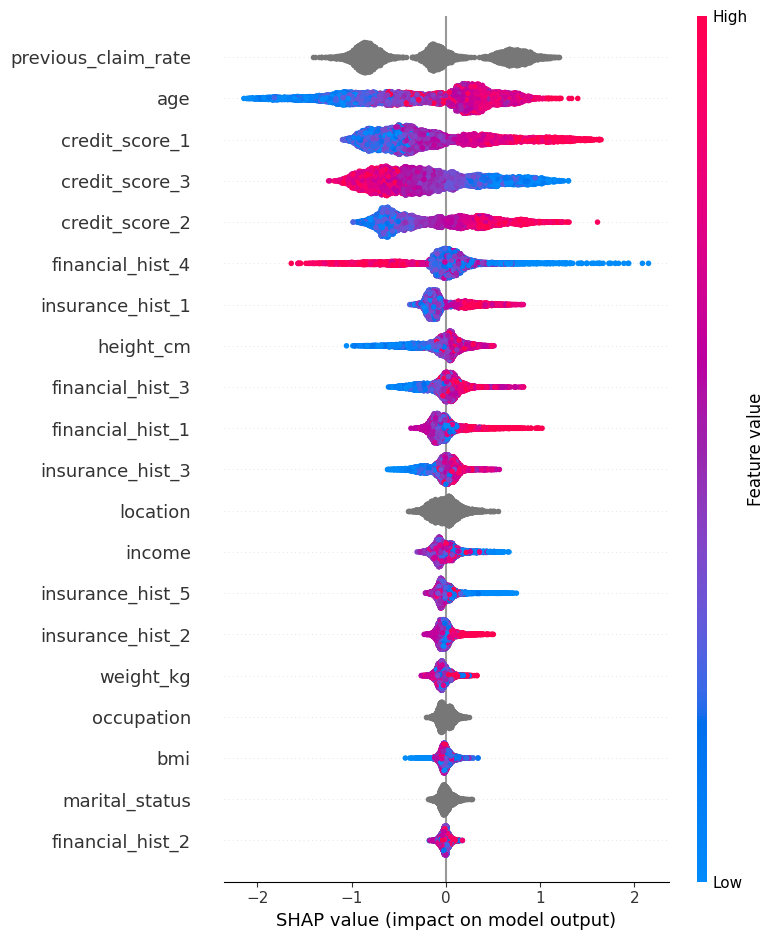

In [13]:
shap.initjs()

shap_values = model3.get_booster().predict(
    xgb.DMatrix(X_train, y_train, enable_categorical=True), pred_contribs=True
)

native_model = model3.get_booster()
shap_values = native_model.predict(
    xgb.DMatrix(X_train, y_train, enable_categorical=True), pred_contribs=True
)

shap.summary_plot(shap_values[:, :-1], X_train)